In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

In [30]:
data = pd.read_csv('C:/Users/atirkey/OneDrive/airflow/cleaned_data.csv')

In [31]:
clustering_columns = ['STATE', 'STORE_TYPE', 'AREA', 'TOTAL_SALES_DOLLARS']
clustering_data = data[clustering_columns]

In [32]:
categorical_columns = ['STATE', 'STORE_TYPE', 'AREA']

target_encoders = {}
for col in categorical_columns:
    te = TargetEncoder()
    clustering_data[col] = te.fit_transform(clustering_data[col], data.index)
    target_encoders[col] = te

C:\Users\atirkey\AppData\Local\Temp\ipykernel_18640\86534729.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data[col] = te.fit_transform(clustering_data[col], data.index)
C:\Users\atirkey\AppData\Local\Temp\ipykernel_18640\86534729.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data[col] = te.fit_transform(clustering_data[col], data.index)
C:\Users\atirkey\AppData\Local\Temp\ipykernel_18640\86534729.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [33]:
numerical_columns = ['TOTAL_SALES_DOLLARS'] + categorical_columns
scaler = StandardScaler()
clustering_data[numerical_columns] = scaler.fit_transform(clustering_data[numerical_columns])

C:\Users\atirkey\AppData\Local\Temp\ipykernel_18640\2677085868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data[numerical_columns] = scaler.fit_transform(clustering_data[numerical_columns])


In [34]:
inertia = []
for k in range(1, 11):
    kmodes = KModes(n_clusters=k, init='Huang', random_state=42)
    kmodes.fit(clustering_data)
    inertia.append(kmodes.cost_)

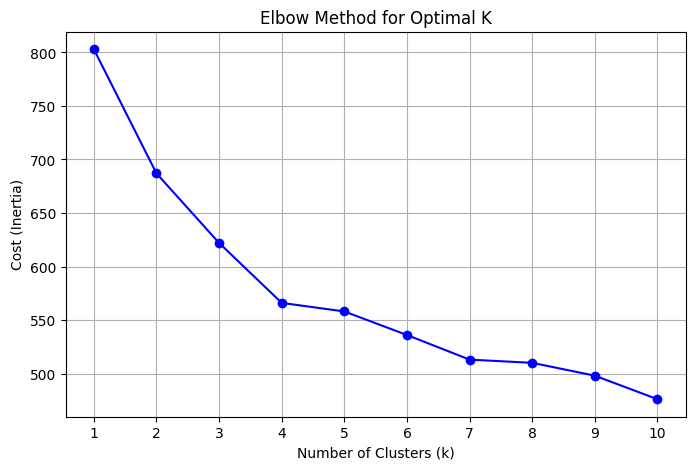

In [35]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Inertia)')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [36]:
optimal_k = 4
kmodes = KModes(n_clusters=optimal_k, init='Huang', random_state=42)
clustering_data['Cluster'] = kmodes.fit_predict(clustering_data)

C:\Users\atirkey\AppData\Local\Temp\ipykernel_18640\1806860440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['Cluster'] = kmodes.fit_predict(clustering_data)


In [37]:
data['Cluster'] = clustering_data['Cluster']

In [38]:
data.to_csv('KmodeClusteringresults.csv', index=False)